# GitHub

## Git Commit and Push

In [12]:
%cd "/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23"

/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23


In [13]:
# Check status
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   Development Notebook.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Development Notebook.ipynb



In [ ]:
# Add/track changed files

# only modified files
#!git add -u

# all files
!git add .

In [ ]:
# Commit the changes
# DON'T FORGET TO CHANGE THE COMMIT MESSAGE
safety_net = input('Have you changed the Commit Message? (Y/N)')
if safety_net == 'Y':
  !git commit -m "Update notebook after the 26.04.2023 meeting." # commit message
  !git config --global user.email "eraraya.ricardo19@gmail.com"
  !git config --global user.name "ericardomuten"
else:
  print('Please change the Commit Message first.')

Have you changed the Commit Message? (Y/N)Y
[main 27945f3] Update notebook after the 26.04.2023 meeting.
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Development Notebook.ipynb (87%)


In [ ]:
# Push changes to GitHub Repo
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 809 bytes | 202.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ericardomuten/qamp-spring-23.git
   e9fde1c..27945f3  main -> main


In [ ]:
# Check status
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


## Git Pull

In [14]:
%cd "/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23"

/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23


In [ ]:
!git pull

In [ ]:
# Check status
!git status

# QAMP Spring 2023

## Resources, Examples, References

- https://github.com/Qiskit/qiskit-machine-learning/blob/main/qiskit_machine_learning/neural_networks/two_layer_qnn.py
- https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html
- https://qiskit.org/ecosystem/machine-learning/tutorials/index.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/05_torch_connector.html
- https://quantum-journal.org/papers/q-2020-02-06-226/pdf/ (original paper)

## List of Requirements (following the original paper)

### Ansatz
- Single qubit: \\
  Rotational Gate layers ($L$) only.

$$
\mathcal{U} = L(N)L(N-1) \ldots L(2)L(1) \\
\text{where:} \\
L(i) = U(\vec\theta_i^{(k)} + \vec w_i^{(k)} \cdot \vec x^{(k)} ) \ U(\vec\theta_i^{(k-1)} + \vec w_i^{(k-1)} \cdot \vec x^{(k-1)} ) \ldots \ U(\vec\theta_i^{(1)} + \vec w_i^{(1)} \cdot \vec x^{(1)} ) \\
\text{Each k vector is 3 dimmensional.} \\
U(\vec\theta) = Rx(\theta_x)Ry(\theta_y)Rz(\theta_z) \\
\vec\theta = (\theta_x, \theta_y, \theta_z) \\
\vec w = (w_x, w_y, w_z) \\
\vec x = \text{input data} \\
N = \text{number of layers}
$$

- Multi qubits without entanglement \\
  Stacking the same ansatz $\mathcal{U}$ for multiple qubits.

- Multi qubits with entanglement (CZ gates) \\
  Alternating between $L$ and entanglement layer $E$. \\
  **For 3 qubits or more? -> Linear entanglement**

$$
\mathcal{U} = L(N)\ E\ L(N-1)\ E \ldots E\ L(2)\ E\ L(1)
$$

### Classification & Measurement Strategy, Cost Function
**Use the one-hot encoding (computational states).**

- Single qubit ansatz
  - **Maximally orthogonal states (single qubit measurement)**:
      The correct states are the C maximally orthogonal states where C is the number of classes. Measure the fidelity between the output single qubit state vs the correct maximally orthogonal state. For example, for 4 classes, use the maximally orthogonal states formed by a tetrahedron inside a Bloch sphere.

$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})=\frac{1}{2} \sum_{\mu=1}^M\left(\sum_{c=1}^{\mathcal{C}}\left(F_c\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$

- Multi qubits ansatz
  - **Maximally orthogonal states (single qubit measurement)**: similar with the single qubit ansatz, but since we have multiple qubits now, we need to fix (choose) which one of the qubits we want to use for the measurement.
$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})=\frac{1}{2} \sum_{\mu=1}^M\left(\sum_{c=1}^{\mathcal{C}}\left(F_c\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$
  - **Maximally orthogonal states (average of multi single qubit measurement)**: similar like above, but instead of choosing 1 qubit, we do a single qubit measurement for all qubits and average the results.
$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})= \frac{1}{2} \sum_{\mu=1}^M \sum_{c=1}^{\mathcal{C}}\left(\sum_{q=1}^Q\left(F_{c, q}\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$
  - **Computational states (multi qubits measurement)**:
      The correct states are the computational states constructed from log2(C) qubits where C is the number of classes. Measure the fidelity between the output multi qubits state vs the correct computational state. For example, for 4 classes, the correct computational states for each classes are 00, 01, 10, and 11.

$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})= \frac{1}{2} \sum_{\mu=1}^M \left(\sum_{q=1}^Q\left(F_{q}\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$

### Fidelity Function $F$
**For now, just use the regular fidelity function.**

$$
|\psi(\vec{\theta}, \vec{w}, \vec{x})\rangle = \mathcal{U} |0\rangle \text{, the output state.}
$$

- (Regular) Fidelity

$$
F_c(\vec{\theta}, \vec{w}, \vec{x})=\left|\left\langle\tilde{\psi}_c \mid \psi(\vec{\theta}, \vec{w}, \vec{x})\right\rangle\right|^2
$$

- Weighted Fidelity

$$
F_c(\vec{\theta}, \vec{w}, \vec{x})=\alpha_c\left|\left\langle\tilde{\psi}_c \mid \psi(\vec{\theta}, \vec{w}, \vec{x})\right\rangle\right|^2 \\
\text{The $\alpha_c$ is from $\vec \alpha = (\alpha_1, \alpha_2, \ldots, \alpha_C)$, which is another trainable parameters vector.}
$$

### Training/Optimization
How do we want to train the circuit? With TensorFlow? SciPy? PyTorch? \\
Integration with QNN implementation of Qiskit Machine Learning (EstimatorQNN and SamplerQNN)? -> **Use PyTorch with TorchConnector feature of Qiskit.**

### Examples

- Example of training the ansatz with Iris Dataset.
  - Ansatz with single qubit
    - Binary classification (2 classes)
    - Multi class classification (3 classes)
  - Ansatz with multi qubits
    - Binary classification (2 classes)
    - Multi class classification (3 classes)

## Code Structure

In [1]:
from IPython.display import clear_output
!pip install qiskit
!pip install qiskit_machine_learning
!pip install pylatexenc
clear_output()

In [2]:
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

In [65]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap

ansatz = RealAmplitudes(3)
ansatz.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

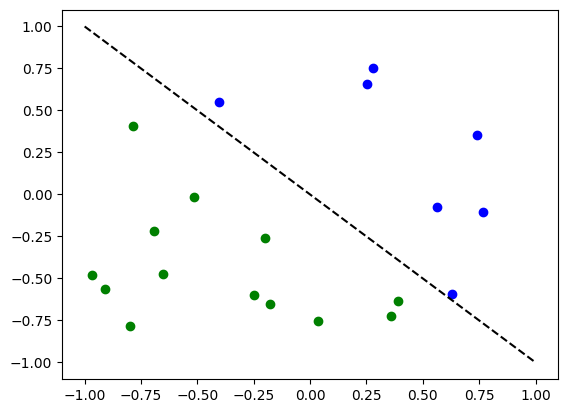

In [3]:
# Generate random dataset

# Select dataset dimension (num_inputs) and size (num_samples)
num_inputs = 2
num_samples = 20

# Generate random input coordinates (X) and binary labels (y)
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for EstimatorQNN example

# Padding the dataset so that the number of features is in multiple of 3
X = np.pad(X, ((0, 0), (0, 1)))

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Plot dataset
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [5]:
class DataReuploading():
    """
    Create the Data Reuploading Classifier ansatz.

    Notes: add QuantumInstance (backend) later.
    """

    def __init__(
        self,
        num_qubits: int | None = None,
        num_features: int | None = None,
        num_layers: int | None = None
    ):
        """
        Args:
            num_qubits: The number of qubits.
            num_features: The number of input features (the dimension of the input data).
            num_layers: The number of layers (N).
        Returns:
            ansatz: A QuantumCircuit object.
        """

        self._num_qubits = num_qubits
        # rounding up the number of features to the nearest integer number that is multiples of 3
        self._num_features = int(np.ceil(num_features/3)*3)
        self._num_layers = num_layers

        self.parameters = ParameterVector(name="θ", length=2*self._num_qubits*self._num_features*self._num_layers)
        self.input_params = ParameterVector(name="x", length=self._num_features)

        qc = QuantumCircuit(self._num_qubits)

        for l in range(self._num_layers):
          for k in range(int(np.ceil(num_features/3))):
            for q in range(self._num_qubits):
              qc.compose(self.rotational_gate_layer(self._num_qubits, q, self.parameters[l*self._num_qubits*int(np.ceil(num_features/3))*2*3 + q*int(np.ceil(num_features/3))*2*3 + k*2*3 : l*self._num_qubits*int(np.ceil(num_features/3))*2*3 + q*int(np.ceil(num_features/3))*2*3 + k*2*3 + 2*3], self.input_params[k*3 : k*3+3]), inplace=True)

          qc.barrier()
          
          # if it's not the last layer, add the entanglement
          if (l+1) != self._num_layers and self._num_qubits != 1:
            qc.compose(self.entanglement_layer(self._num_qubits), inplace=True)
            qc.barrier()

        self.circuit = qc

    def rotational_gate_layer(
        self,
        num_qubits: int | None = None,
        qubit_id: int | None = None,
        trainable_params : ParameterVector | None = None,
        input_params : ParameterVector | None = None
    ):
        """
        Edo
          This is the L layer.
          Args:
              num_qubits: The number of qubits.
              num_features: The number of input features (the dimension of the input data).
          Returns:
              circuit_block: A QuantumCircuit object with ParameterVector as gate's arguments.
        """

        circuit_block = QuantumCircuit(num_qubits)
        circuit_block.rx(trainable_params[0] + trainable_params[3]*input_params[0], qubit_id)
        circuit_block.ry(trainable_params[1] + trainable_params[4]*input_params[1], qubit_id)
        circuit_block.rz(trainable_params[2] + trainable_params[5]*input_params[2], qubit_id)

        return circuit_block



    def entanglement_layer(
        self,
        num_qubits: int | None = None
    ):
        """
        Shivani
          This is the E layer.
          Args:
              num_qubits: The number of qubits.
          Returns:
              circuit_block: A QuantumCircuit object consists of only CZ gates.
        """

        circuit_block = QuantumCircuit(num_qubits)

        # Apply CZ gates between adjacent qubits linearly
        for i in range(num_qubits - 1):
            circuit_block.cz(i, i + 1)


        return circuit_block


    @property
    def num_qubits(self) -> int:
        """Returns the number of qubits used by the ansatz."""
        return self._num_qubits

    @property
    def num_features(self) -> int:
        """Returns the number of features of the input data accepted by the ansatz."""
        return self._num_features

    @property
    def num_layers(self) -> int:
        """Returns the number of layers used by the ansatz."""
        return self._num_layers

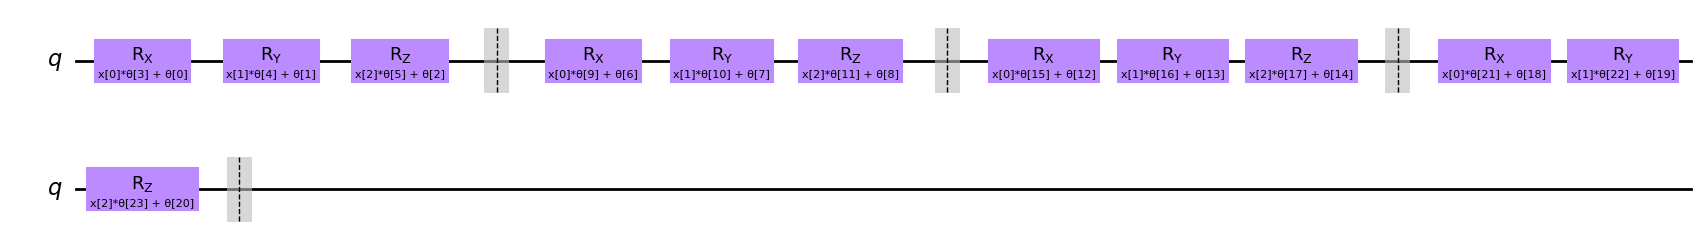

In [6]:
DRC = DataReuploading(num_qubits=1, num_features=2, num_layers=4)
DRC.circuit.draw('mpl')

In [8]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=DRC.circuit, input_params=DRC.input_params, weight_params=DRC.parameters
)

# Set up PyTorch module
model1 = TorchConnector(qnn1)

In [9]:
# Test with a single input
model1(X_[0, :])

tensor([0.5902], grad_fn=<_TorchNNFunctionBackward>)

In [10]:
# Define optimizer and loss
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Note from (https://pytorch.org/docs/stable/optim.html):
# Some optimization algorithms such as LBFGS need to
# reevaluate the function multiple times, so you have to
# pass in a closure that allows them to recompute your model.
# The closure should clear the gradients, compute the loss,
# and return it.
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients
    loss = f_loss(model1(X_), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer step4
optimizer.step(closure)

30.925395965576172
16.872392654418945
9.657137870788574
6.9095458984375
5.144740581512451
4.569372653961182
3.1289594173431396
2.9337987899780273
2.863201141357422
2.8070716857910156
2.739845037460327
2.6622402667999268
2.549417734146118
2.475526809692383
2.3887927532196045
2.2856571674346924
2.19757342338562
2.117572546005249
2.063673734664917
2.0551764965057373


tensor(30.9254, grad_fn=<MseLossBackward0>)

Accuracy: 1.0


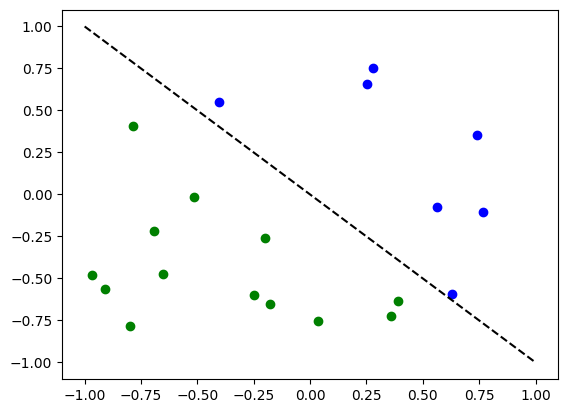

In [11]:
# Evaluate model and compute accuracy
y_predict = []
for x, y_target in zip(X, y):
    output = model1(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy:", sum(y_predict == y) / len(y))

# Plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()